In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading dataset of elections2024
df=pd.read_csv('election2024.csv')

In [ ]:
#first five rows
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
#checking whether null values present or not
df.isnull().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [ ]:
#null values present in two columns they are job_type and company_type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [ ]:
#columns of dataset
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [ ]:
#shape of dataset
print(f"no of records:{df.shape[0]} and no of columns is {df.shape[1]}")

no of records:1600 and no of columns is 16


In [ ]:
#removing unwanted column id
new_df=df.iloc[:,1:]

In [ ]:
#this new_df data not contains the column id
new_df.head(3)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691


In [ ]:
#numerical columnns in the dataset
numerical_columns=new_df.columns[new_df.dtypes=='float64']
print(f"numerical columns :---->{numerical_columns}")

numerical columns :---->Index(['age', 'weight1'], dtype='object')


In [ ]:
#categorical columns in the dataset
categorical_columns=new_df.columns[new_df.dtypes=='object']
print(f'categorical_columns :--->{categorical_columns}')

categorical_columns :--->Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')


NUMERICAL ANALYIS  (UNIVARIATE)

In [ ]:
print(f"analysis on column {numerical_columns[0]}")

analysis on column age


In [ ]:
#descriptive statistics
new_df[numerical_columns[0]].describe()

#median and mean are almost near to each other so no-skewness
#50% of the people are below the age 49
#max age of the people taken in the datset is 100
#min age of the people taken in the datset is 18
#so we can say the dataset is well taken because it has taken responses from all ages of group who have ability to
#their own decision

,age
count,1600.000000
mean,49.936250
std,16.901797
min,18.000000
25%,37.000000
50%,49.000000
75%,64.000000
max,90.000000


In [ ]:
new_df[numerical_columns[0]].skew()

#it is almost in normal distribution

0.06980851883608498

<Axes: ylabel='Frequency'>

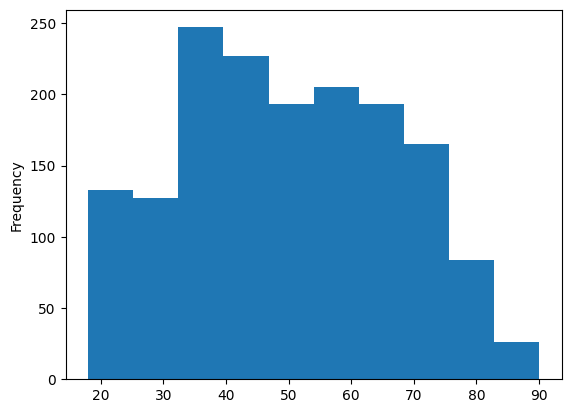

In [ ]:
#histplot
new_df[numerical_columns[0]].plot(kind='hist')

#it has taken all age group from 18 to 100
#mostly the dataset contains the responses of person who belongs to the age group between 35 to 65

<Axes: ylabel='Density'>

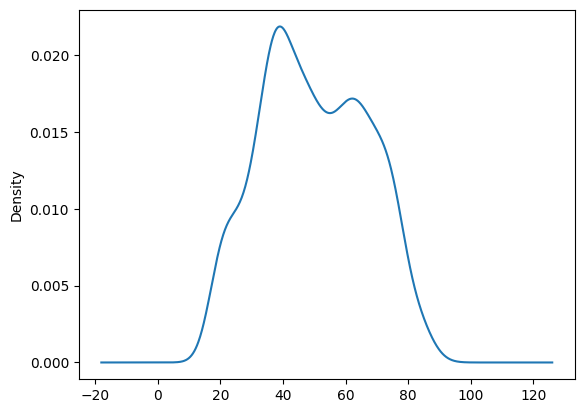

In [ ]:
#kde plot

new_df[numerical_columns[0]].plot(kind='kde')
#depicts the same
#and it is almost normalized distribution

In [ ]:
#null values checking

new_df[numerical_columns[0]].isnull().sum()

0

<Axes: >

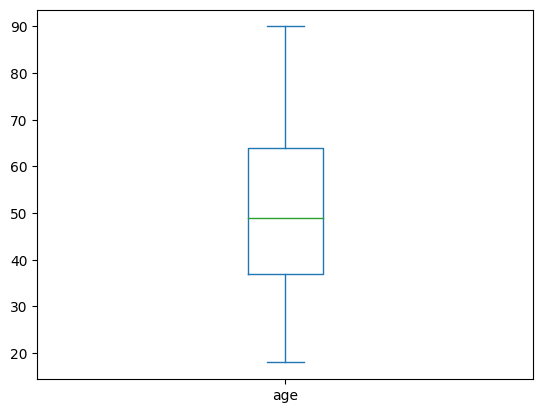

In [ ]:
#outliers checking
new_df[numerical_columns[0]].plot(kind='box')


#so no outliers is present in the age column

FEATURE ENGINEERING ON AGE COLUMN

IT WILL HELPS TO GET MORE INSIGHTS

CONVERTING THE AGE COLUMN INTO BINS (DISCRETIZATION)

In [ ]:
new_df['age_binned'] = pd.cut(new_df['age'], bins=[0,18,30, 40,50,60, 100],
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+'],right=False)


In [ ]:
new_df['age_binned']

,age_binned
0,19-30
1,19-30
2,19-30
3,19-30
4,19-30
...,...
1595,61+
1596,61+
1597,61+
1598,61+


In [ ]:
print(f"numerical analysis on {numerical_columns[1]} ")

numerical analysis on weight1 


In [ ]:
#uses of weight1 column:
#---> it is used to give vote weightage so that when we want know the weighted average of votes  each candidate  so that we can simply predict



In [ ]:
new_df[numerical_columns[1]].describe()

#min weight given to the vote of person is 0.468
#max weightage given is 2.515 --> this person vote response is given more importance
#on average each person havw weightage 1.0000

,weight1
count,1600.000000
mean,1.000000
std,0.327084
min,0.468226
25%,0.772224
50%,0.921724
75%,1.158913
max,2.515072


In [ ]:
new_df[numerical_columns[1]].skew()
#it is positively skewed why because some person has give high weightage than the remaining ones

1.1926944490270435

<Axes: ylabel='Density'>

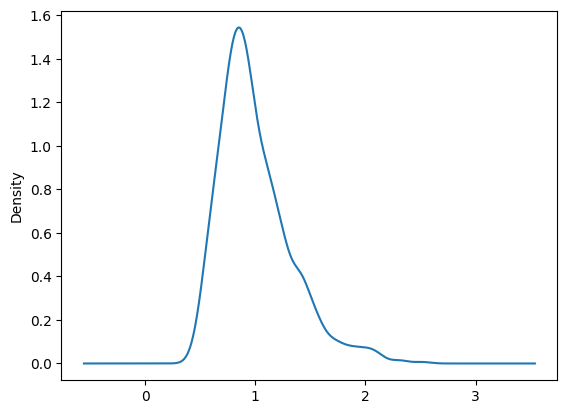

In [ ]:
new_df[numerical_columns[1]].plot(kind='kde')

#it is seeming to be no skewness but there is some positive skewness which lead to have long right tail

<Axes: ylabel='Frequency'>

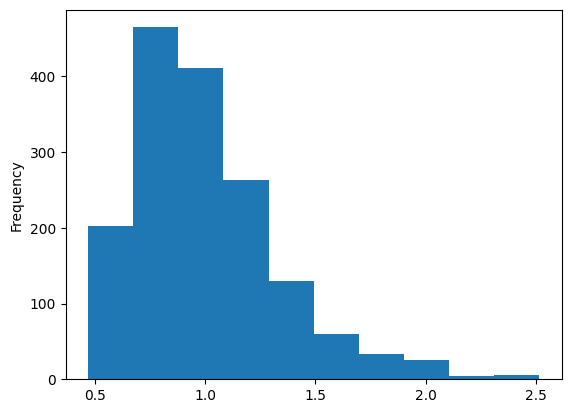

In [ ]:
new_df[numerical_columns[1]].plot(kind='hist')

#observations:
#mostly the weights are given in the range 0.5 to 1.5
#high weights are given to some persons which lead have positive skewness


categorical analysis  (univariate)

In [ ]:
len(categorical_columns)

13

In [ ]:
fig,axes=plt.subplots(nrows=13,ncols=2,figsize=(10,60))
for i in range(len(categorical_columns)):
  for j in range(2):
    if j==0:
      new_df[categorical_columns[i]].value_counts().plot(kind='bar',ax=axes[i,j],title=f"{categorical_columns[i]}")


    elif j==1:
      new_df[categorical_columns[i]].value_counts().plot(kind='pie',ax=axes[i,j],title=f"{categorical_columns[i]}")


    j+=1
  i+=1
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

<ipython-input-38-8168bf8d6f23>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


In [ ]:
categorical_columns


Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

<Axes: title={'center': 'pie chart for sex column'}, ylabel='count'>

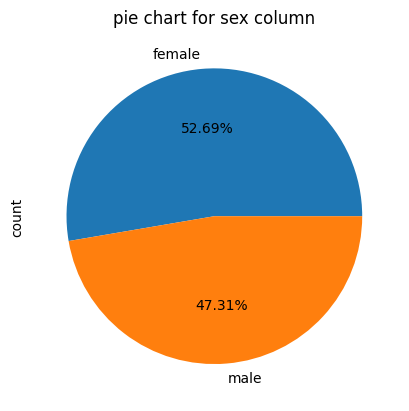

In [ ]:
new_df['sex'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for sex column')

#if you observe 52% of females and 48 % are males so approximately by 4% top 5% females are more

count       1600
unique         2
top       female
freq         843
Name: sex, dtype: object


<Axes: xlabel='sex'>

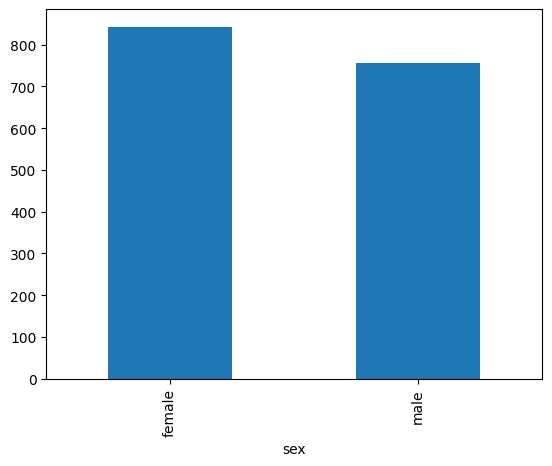

In [ ]:
print(new_df['sex'].describe())
new_df['sex'].value_counts().plot(kind='bar')

<Axes: title={'center': 'pie chart for federal_district column'}, ylabel='count'>

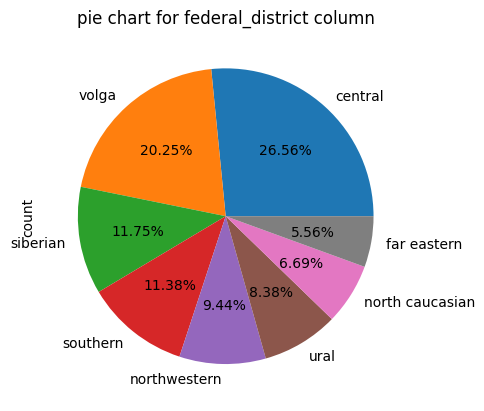

In [ ]:
new_df['federal_district'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for federal_district column')

#mostly the respondents are from central and then volga
#from region far eastern there are least respondents

count        1600
unique          8
top       central
freq          425
Name: federal_district, dtype: object


<Axes: title={'center': 'bar chart for federal_district column'}, xlabel='federal_district'>

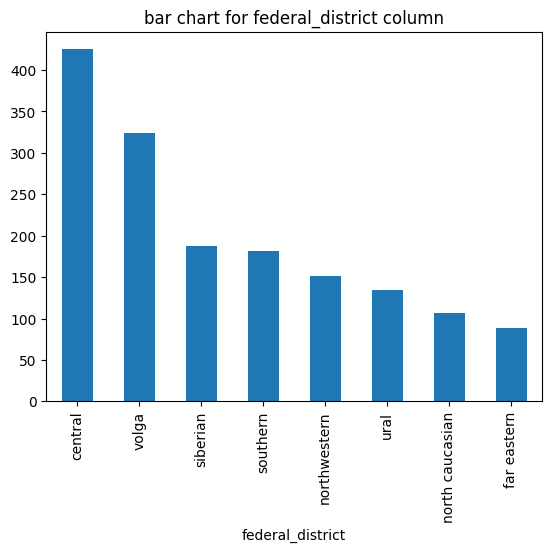

In [ ]:
print(new_df['federal_district'].describe())
new_df['federal_district'].value_counts().plot(kind='bar',title='bar chart for federal_district column')

In [ ]:
categorical_columns

Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

<Axes: title={'center': 'pie chart for type_of_city column'}, ylabel='count'>

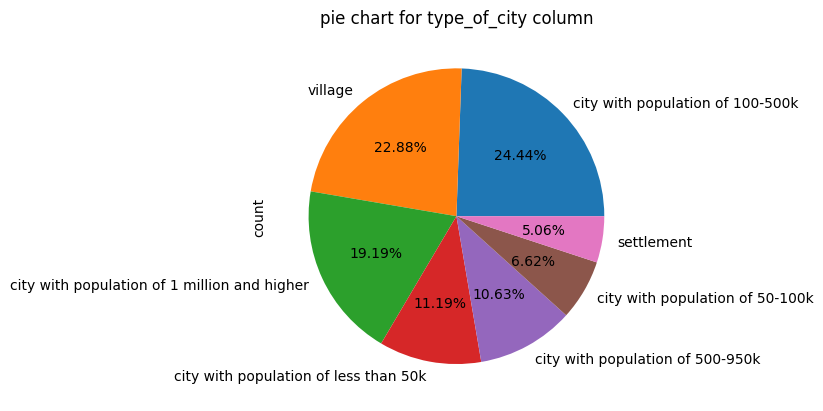

In [ ]:
new_df['type_of_city'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for type_of_city column')

#observations
#the respondents are mostly from the area city with  population of 100-500k and the village
#less no of responses taken from the region settlement and city with population 50-100k

count                                 1600
unique                                   7
top       city with population of 100-500k
freq                                   391
Name: type_of_city, dtype: object


<Axes: title={'center': 'bar chart for type_of_city column'}, xlabel='type_of_city'>

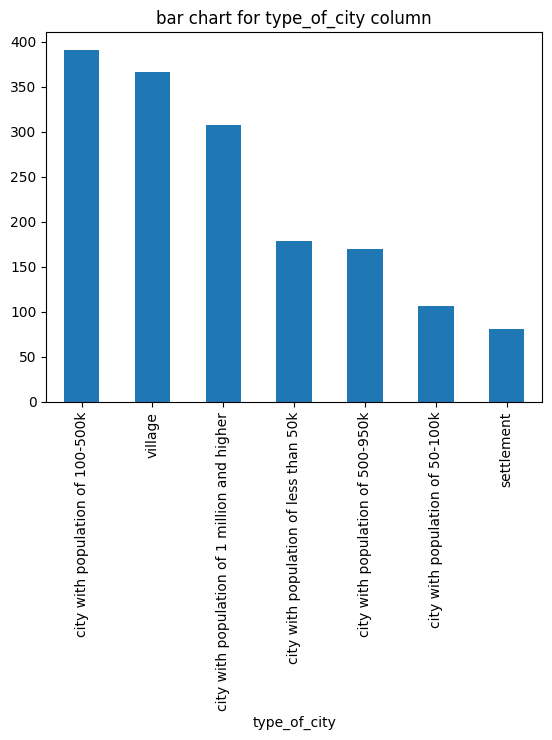

In [ ]:
print(new_df['type_of_city'].describe())
new_df['type_of_city'].value_counts().plot(kind='bar',title='bar chart for type_of_city column')


In [ ]:
categorical_columns

Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

<Axes: title={'center': 'pie chart for knows_election_date column'}, ylabel='count'>

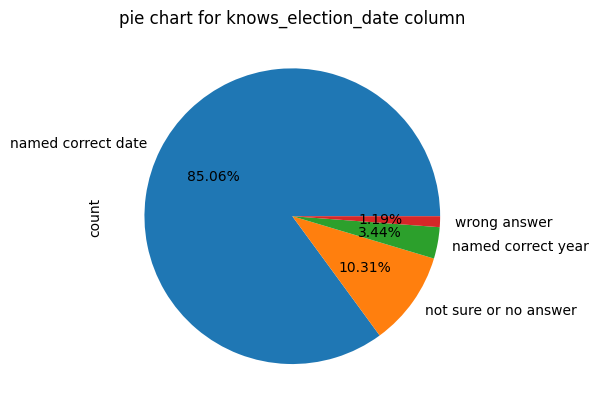

In [ ]:
new_df['knows_election_date'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for knows_election_date column')
#observations
#85% of people knows the election date
#but reamaining 15% of people even dont know  the election date properly

count                   1600
unique                     4
top       named correct date
freq                    1361
Name: knows_election_date, dtype: object


<Axes: title={'center': 'bar chart for knows_election_date column'}, xlabel='knows_election_date'>

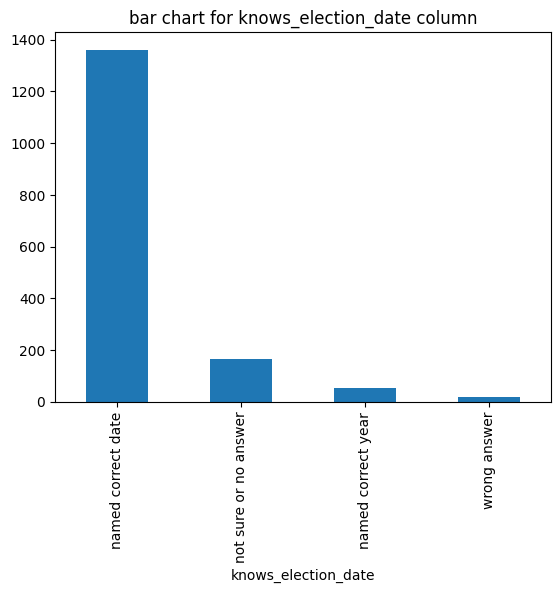

In [ ]:
print(new_df['knows_election_date'].describe())
new_df['knows_election_date'].value_counts().plot(kind='bar',title='bar chart for knows_election_date column')

In [ ]:
categorical_columns

Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

<Axes: title={'center': 'pie chart for will_vote column'}, ylabel='count'>

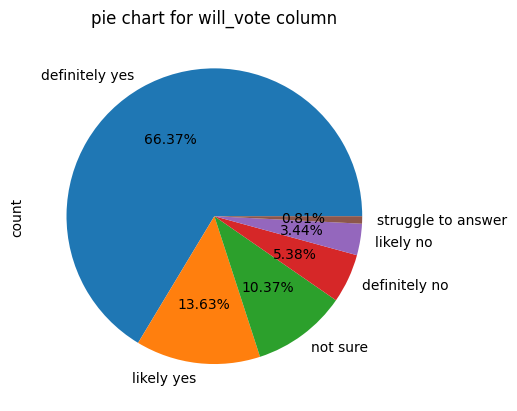

In [ ]:
new_df['will_vote'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for will_vote column')
#observations
#only 66% of people are surely said they will vote
#but remaining people are not confident about their answer
#among them some people are saying they dont vote nearly 5.3% of people
#13.6% are said they will vote likely
#so nearly 10% of people they are not ready to vote


count               1600
unique                 6
top       definitely yes
freq                1062
Name: will_vote, dtype: object


<Axes: title={'center': 'bar chart for will_vote column'}, xlabel='will_vote'>

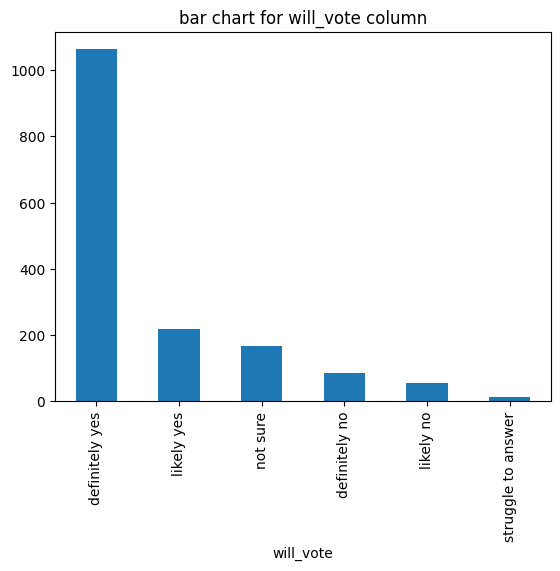

In [ ]:
print(new_df['will_vote'].describe())
new_df['will_vote'].value_counts().plot(kind='bar',title='bar chart for will_vote column')

In [ ]:
categorical_columns


Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

<Axes: title={'center': 'pie chart for candidate column'}, ylabel='count'>

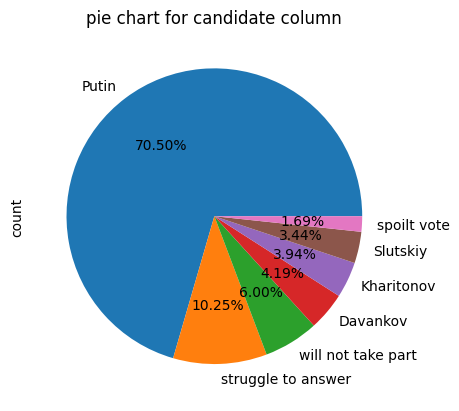

In [ ]:
new_df['candidate'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for candidate column')
#each person have their own decision
#mostly the people preferred the putin as their choice nearly 70.50% of people choosed him
#next candidate is davankov but only 4.9% of people choosed him
#some people struggled to answer nearly 10% of people
#but as the data given putin has more chances of win
#there are spoilt votes are there of 1.6% --> that means the respondents are not interest to vote or not interested of voting  the  candidates

In [ ]:
categorical_columns

Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

<Axes: title={'center': 'pie chart for television_usage column'}, ylabel='count'>

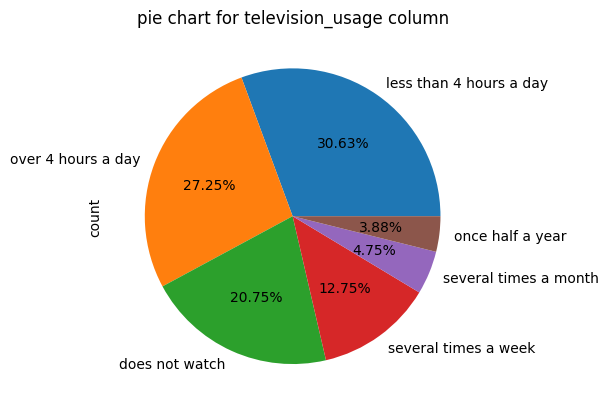

In [ ]:
new_df['television_usage'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for television_usage column')
#some people watches television over 4 hours a day and some people watches tv less than four hours a day
#some people once half a year and several times a week etc..,
#but mostly the people watches the tv less than four a day and next mostly there are people who watches tv over 4 hours a day

#interestingly there are nearly 20.75% of people are there who dont watch tv


<Axes: title={'center': 'pie chart for internet_usage column'}, ylabel='count'>

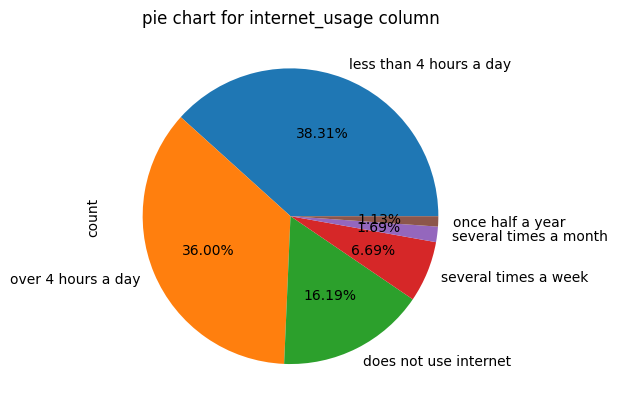

In [ ]:
new_df['internet_usage'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for internet_usage column')

<Axes: title={'center': 'pie chart for education column'}, ylabel='count'>

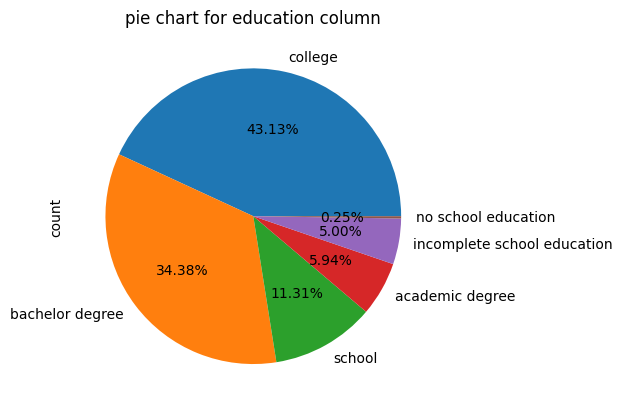

In [ ]:
new_df['education'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for education column')
#some people are in college level and some are in bachelor level and som are in school level eduaction
#they have also taken who got academic degree and have no any schooling education
#they have taken respones of people who have different standards of eduaction
#but form the people who have taken are almost from college and bachelor degree level'
#only few people are there who have no schooling and incomplete school eduaction


<Axes: title={'center': 'pie chart for income column'}, ylabel='count'>

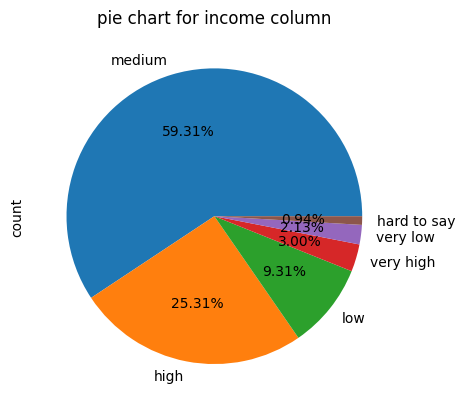

In [ ]:
new_df['income'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for income column')
#mostly the respondents are from middle class .-->60%
#high standard people percentage-->25%
#they are also people who are from very high and very low background


<Axes: title={'center': 'pie chart for employment column'}, ylabel='count'>

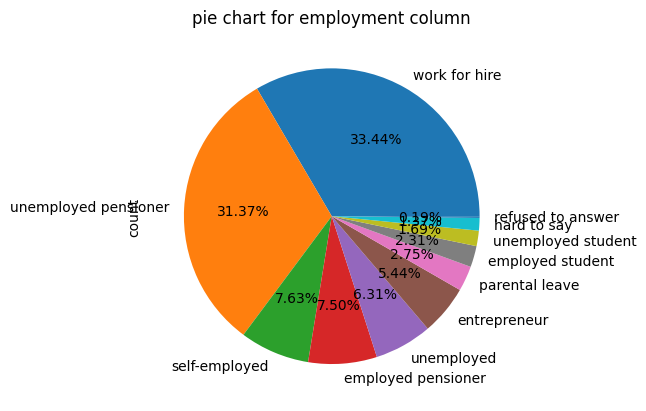

In [ ]:
new_df['employment'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for employment column')

<Axes: title={'center': 'pie chart for job_type column'}, ylabel='count'>

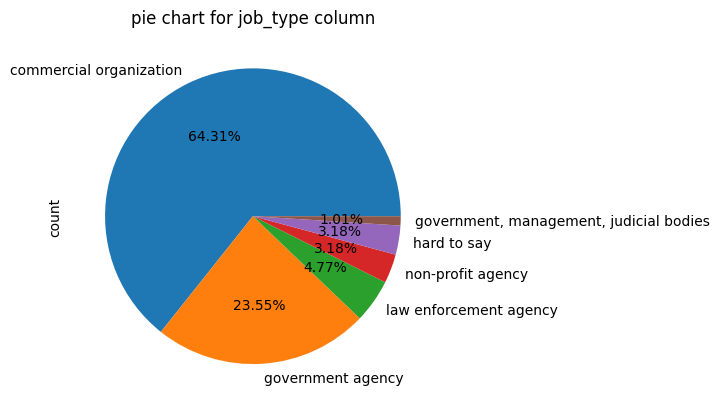

In [ ]:
new_df['job_type'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for job_type column')

<Axes: title={'center': 'pie chart for company_type column'}, ylabel='count'>

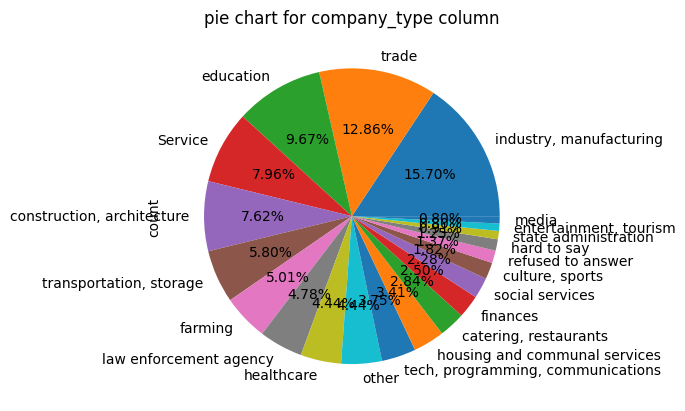

In [ ]:
new_df['company_type'].value_counts().plot(kind='pie',autopct='%.2f%%',title='pie chart for company_type column')
#they belongs to different sectors and their comapny_type are also different

In [ ]:
new_df['company_type'].value_counts()

,count
company_type,
"industry, manufacturing",138
trade,113
education,85
"Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...",70
"construction, architecture",67
"transportation, storage",51
farming,44
law enforcement agency,42
healthcare,39


In [ ]:
#fouth occupation is in russian
#Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...-->means
#Service Sector (including laundry/dry cleaning, furniture repair, watch/jewelry repair, etc

#lets replacing that name with service sector

new_df['company_type']=new_df['company_type'].str.replace('Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...','Service')

In [ ]:
new_df['company_type'].value_counts()[:4]   #value_replaced

,count
company_type,
"industry, manufacturing",138
trade,113
education,85
Service,70



categorical
 categorical nalysis

In [ ]:
new_df.columns


Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1', 'age_binned'],
      dtype='object')

<Axes: xlabel='sex'>

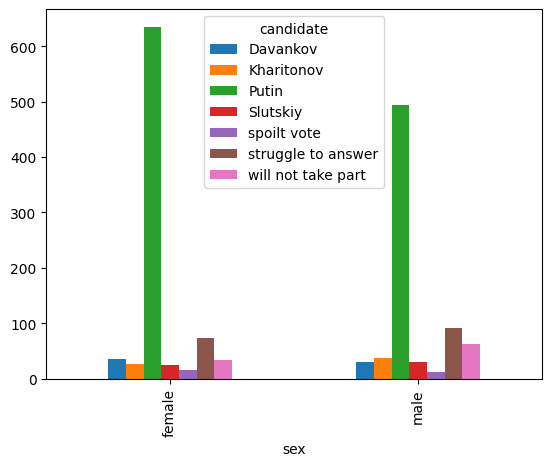

In [ ]:
new_df.groupby(['sex','candidate']).size().unstack().plot(kind='bar')
#as we are seeing that distribution because in the datset feamles are more
#by seeing we can say that males and female preferences are same
#only change is females prefered more Davankov than the Kharitonov and males choosen kharitonov over Davantov

comparing age with candidate

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='candidate', ylabel='age'>

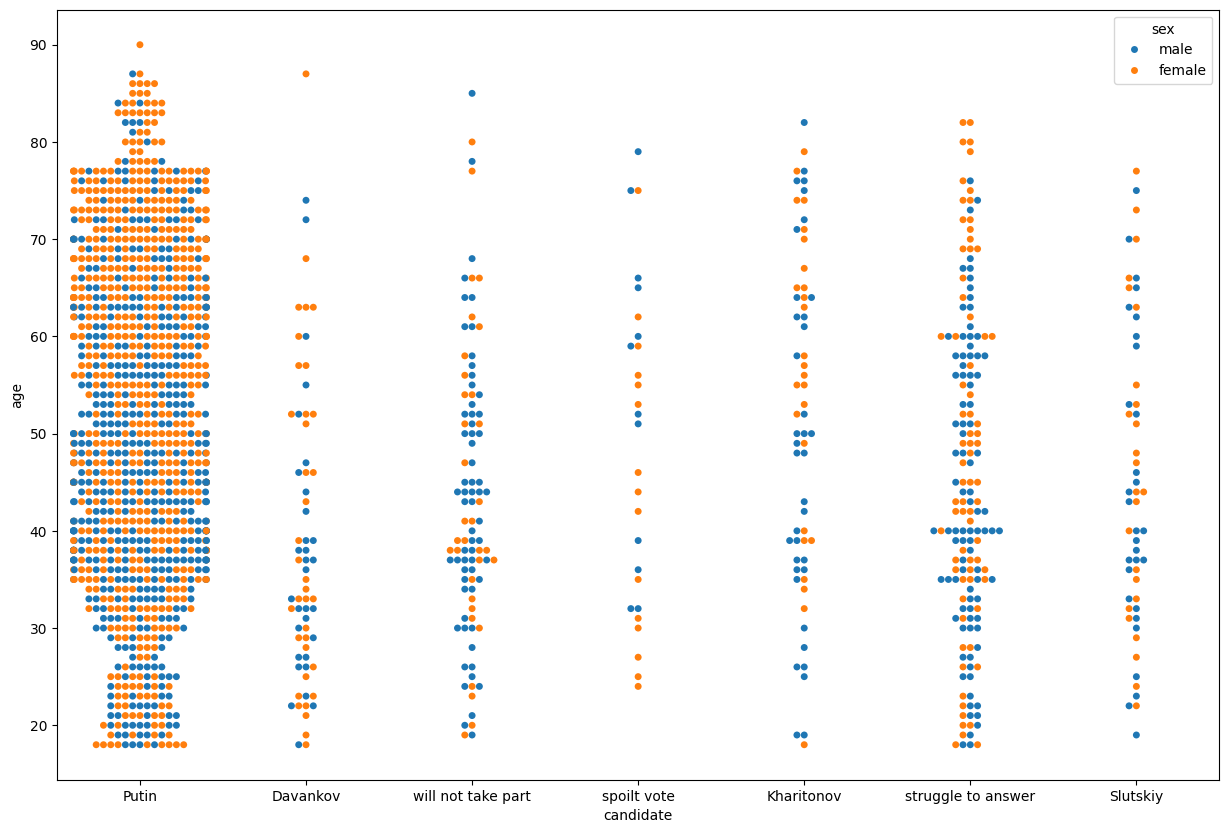

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=new_df,x='candidate',y='age',hue='sex')

<Axes: xlabel='will_vote'>

<Figure size 1500x1000 with 0 Axes>

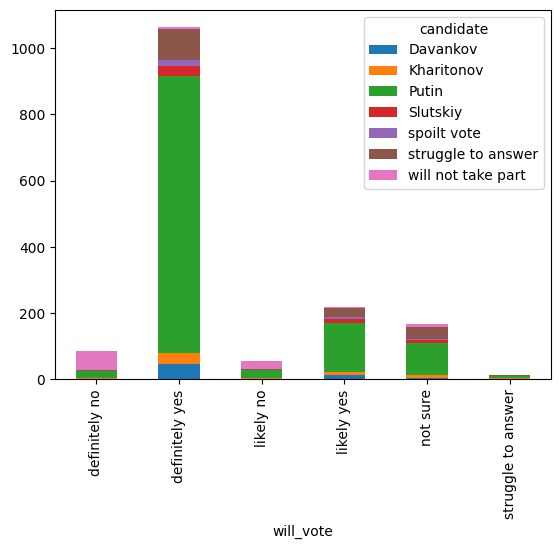

In [ ]:
plt.figure(figsize=(15,10))
new_df.groupby(['will_vote','candidate']).size().unstack().plot(kind='bar',stacked=True)
#observations:
#whatever the people decision is whether they are willing to vote or not but they mostly preferred to vote to putin
#the people who are decided to not to vote they also preferred to vote to putin
#so if they vote the chance for voting to putin is high so it will help putin only



<Axes: xlabel='federal_district', ylabel='count'>

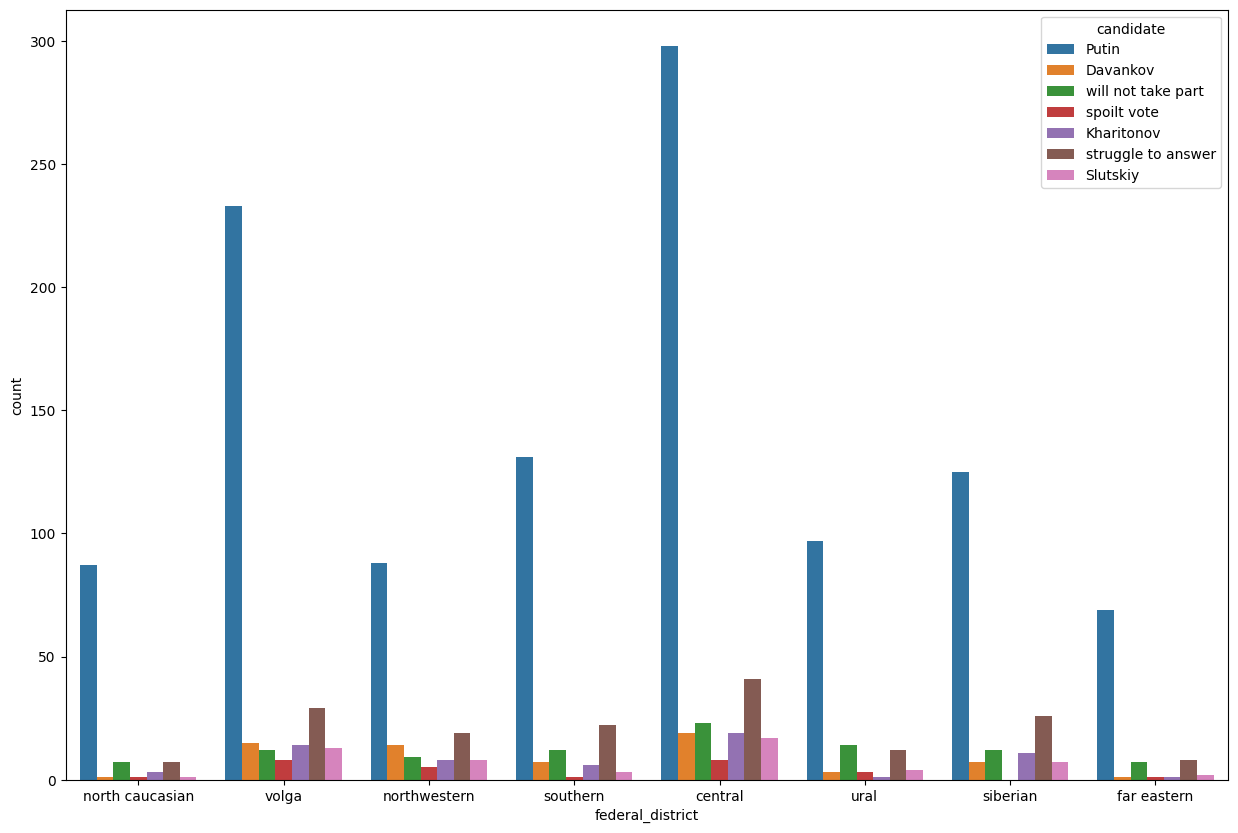

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=new_df,x='federal_district',hue='candidate')

#in every district putin has more chances of win
#but if we see there are some people who were struggle to give answer and their count is also reasonable so it might affect
#why because they are not fond of putin and they will to vote others and they wanted to keep secret

<Axes: xlabel='television_usage', ylabel='count'>

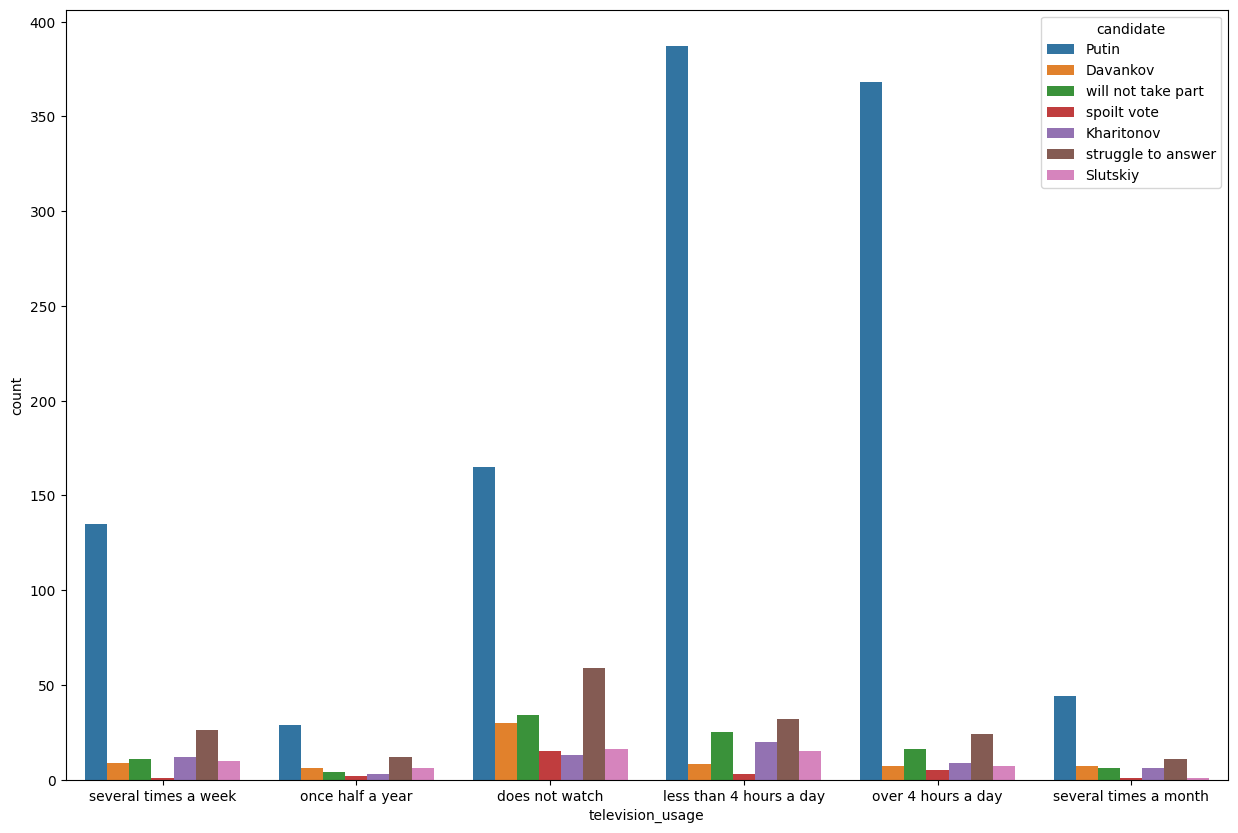

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=new_df,x='television_usage',hue='candidate')

#the people who spend most time in watching tv they mostly prefreed putin
#the people who dont watch tv they are struggle to answer and they are preferred Davankov after the putin
#but interestingly the people who watches more time in  tv they are less preferred in Davankov and they preferred slutskiy and kharitonov

<Axes: xlabel='internet_usage', ylabel='count'>

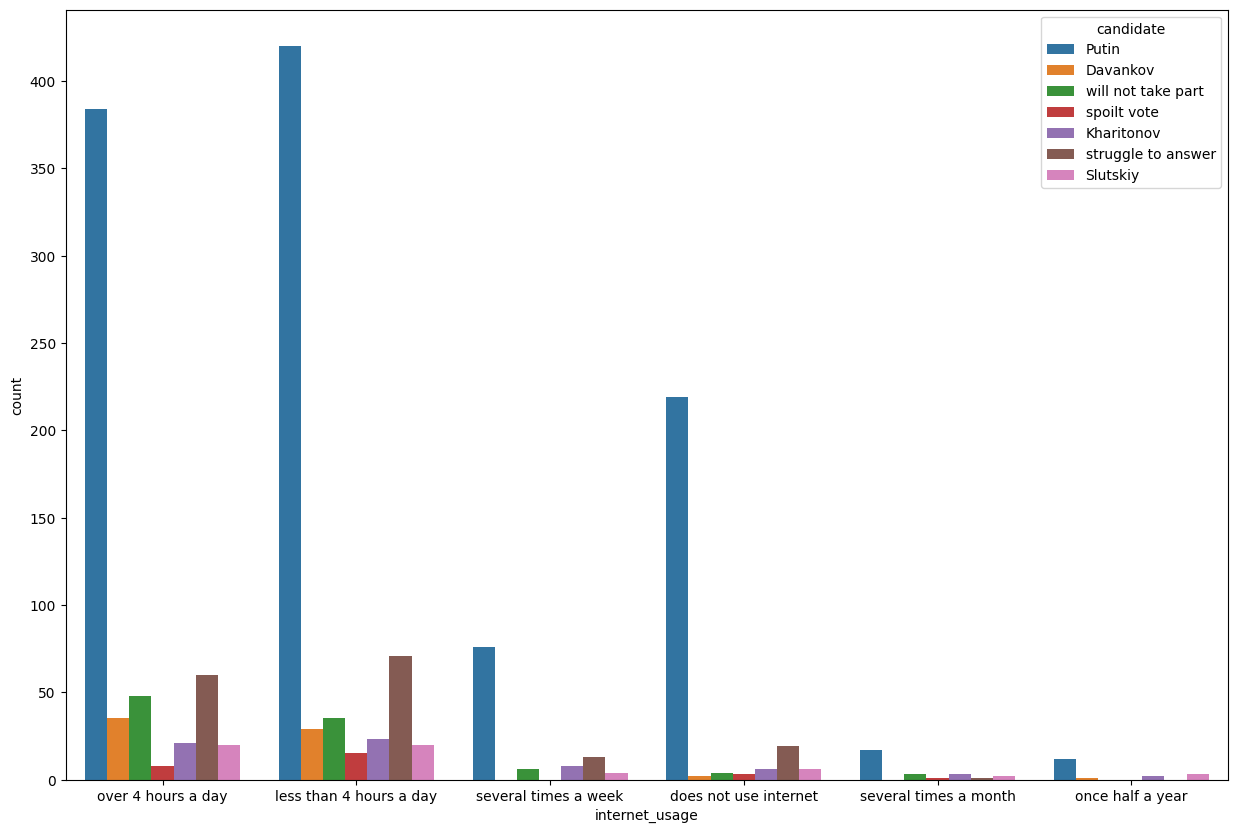

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=new_df,x='internet_usage',hue='candidate')
#here interestigly opposite to tv usage ,the people who spend more time in internet after putin they preferred the Davankov

<Axes: xlabel='income', ylabel='count'>

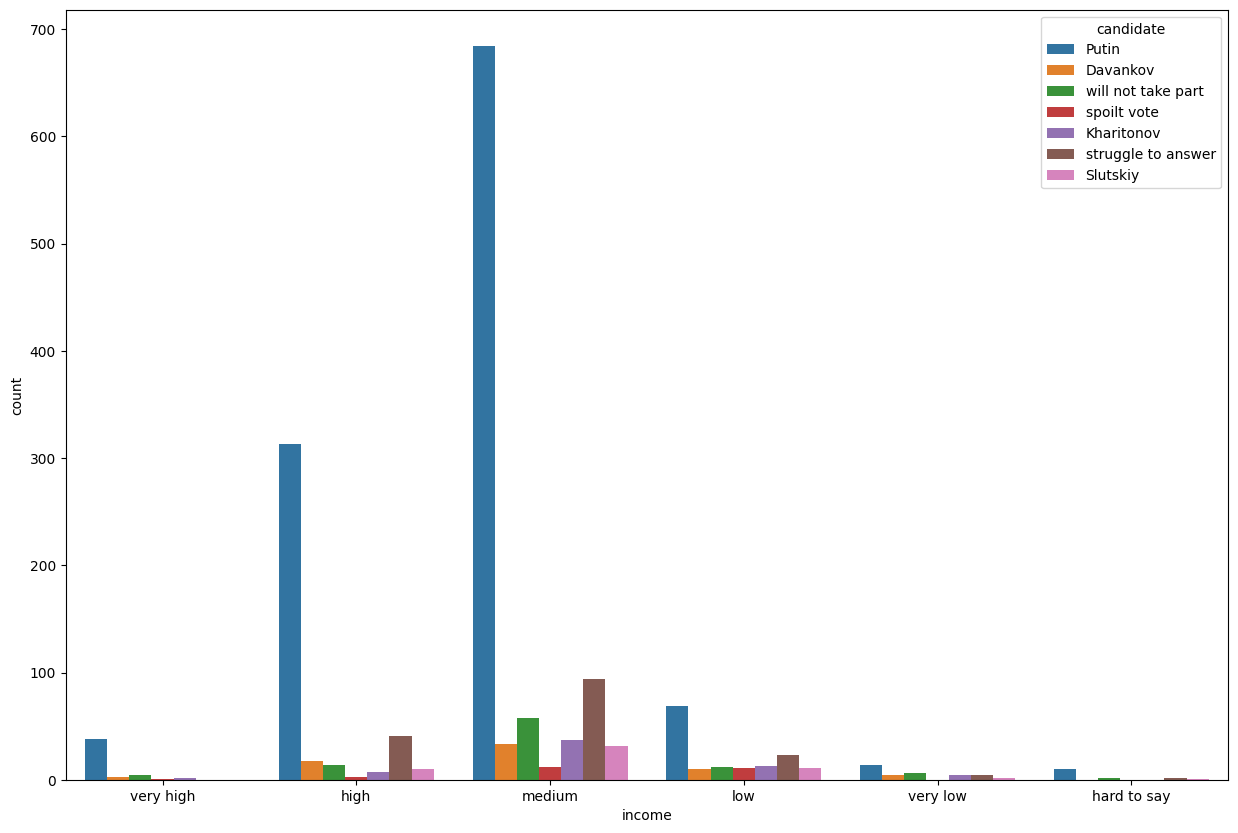

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=new_df,x='income',hue='candidate')

<Axes: xlabel='education', ylabel='count'>

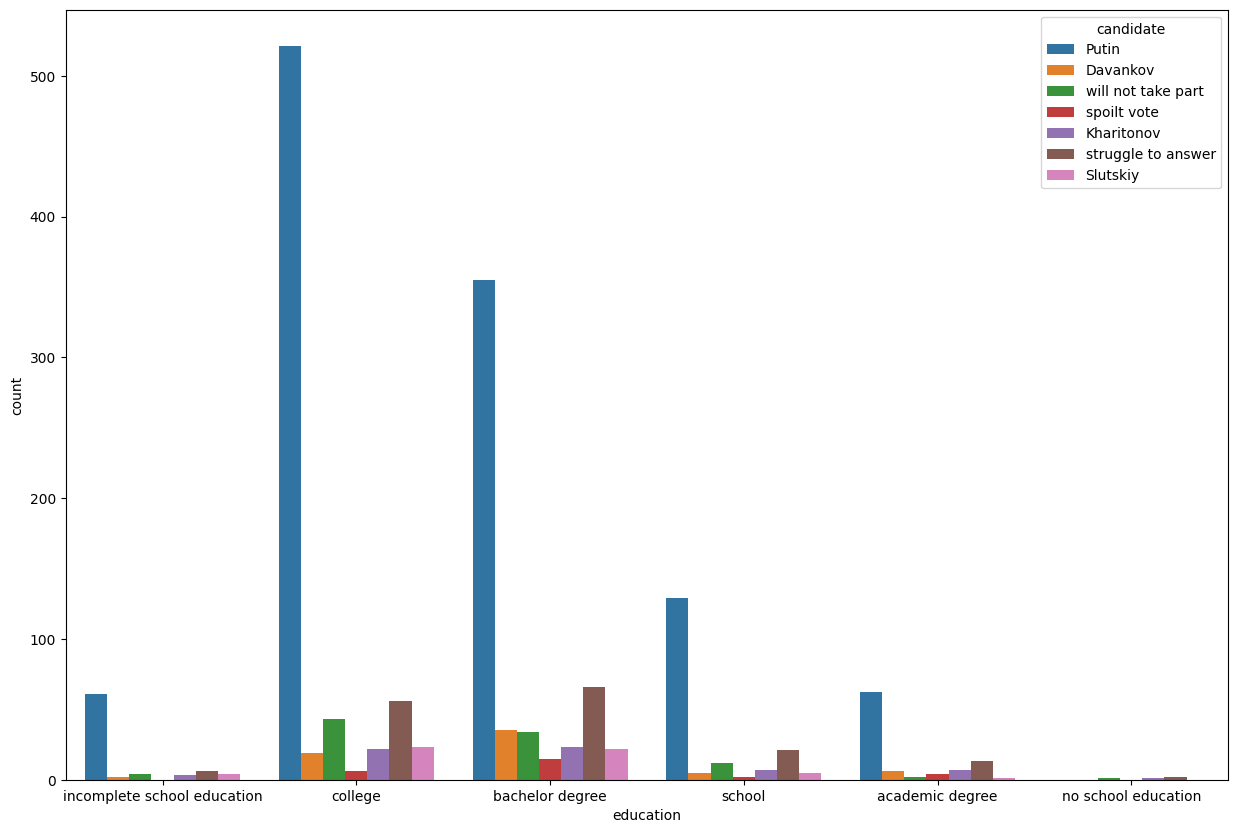

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=new_df,x='education',hue='candidate')